In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
df=pd.read_csv('SydneyHousePrices.csv')
df=pd.read_csv('SydneyHousePrices.csv',index_col=[0],parse_dates=True,squeeze=True)
date_form = DateFormatter("%m-%d-%Y")
df.head(-100)

,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
Date,,,,,,,,
2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house
...,...,...,...,...,...,...,...,...
2016-08-13,199400,Illawong,2234,1227000,4.0,2,2.0,house
2016-08-13,199401,Menai,2234,1005000,4.0,2,2.0,house
2016-08-12,199402,Bangor,2234,925000,4.0,2,2.0,house


In [3]:
df.describe()

,Id,postalCode,sellPrice,bed,bath,car
count,199504.00000,199504.000000,1.995040e+05,199350.000000,199504.000000,181353.000000
mean,99752.50000,2196.379155,1.269776e+06,3.516479,1.890669,1.936224
std,57591.98839,193.053467,6.948239e+06,1.066555,0.926001,1.060237
min,1.00000,2000.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,49876.75000,2082.000000,7.200000e+05,3.000000,1.000000,1.000000
50%,99752.50000,2144.000000,9.850000e+05,3.000000,2.000000,2.000000
75%,149628.25000,2211.000000,1.475000e+06,4.000000,2.000000,2.000000
max,199504.00000,4878.000000,2.147484e+09,99.000000,99.000000,41.000000


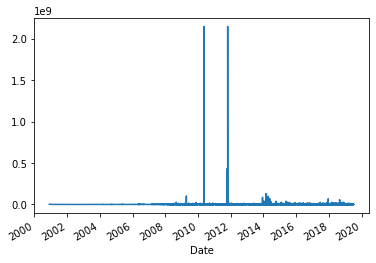

In [9]:
df['sellPrice'].plot()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop('sellPrice',axis = 1)
y = df.sellPrice

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [8]:
x_train.shape

(139652, 7)

In [9]:
categorical_col = [cname for cname in x_train.columns if x_train[cname].dtype=='object']
numerical_col = [cname for cname in x_train.columns if x_train[cname].dtype in['int64','float64']]

In [10]:
categorical_col

['suburb', 'propType']

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [13]:
numerical_transformer = SimpleImputer(strategy = 'mean')

In [20]:
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown = 'ignore'))
])
preprocessor = ColumnTransformer(transformers = [
    ('num',numerical_transformer,numerical_col),
    ('cat',categorical_transformer,categorical_col)
])

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state = 0)

In [18]:
from sklearn.metrics import mean_absolute_error

In [ ]:
my_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])
my_pipeline.fit(x_train,y_train)

In [ ]:
predicton = my_pipeline.(x_text)
score = mean_absolute_error(y_test,prediction)
print('MAE:',score)